## Understanding The Data

In [337]:
# Import necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [338]:
# Load The Data
df=pd.read_csv('day.csv',index_col=False)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [339]:
# Check shape of the Dataframe
df.shape

(730, 16)

In [340]:
# Check info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [341]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [342]:
# Check Missing values in dataframe
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [343]:
# Dropping the Duplicates
df.drop_duplicates(inplace=True)

In [344]:
df.shape

(730, 16)

#### There are "No Duplicates" in Dataframe beacuse shape of the data is same

In [345]:
# Dropping columns which are not necessary
# 1. Instant column is just an index
# 2. dteday column information can be utilized from Mnth and yr column
# 3. "cnt" variable is sum of "casual" and "registered" column, so can be removed

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [185]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [187]:
# Encoding the season column. since there is no order so would be good to convert it into categorical value

season_dict={1:'spring', 2:'summer', 3:'fall', 4:'winter'}
df['season']=df['season'].replace(season_dict)

In [188]:
df['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [189]:
# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [191]:
# Encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [195]:
# Encoding/mapping the month column

df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [196]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Visualizing Data

In [241]:
# Analysing Categorical Columns

def plot_cat_columns(column):
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=df)
    plt.subplot(1,2,2)
    ax=sns.barplot(x=column,y='cnt',data=df, hue='yr',palette='Set2')
    handles, labels = ax.get_legend_handles_labels()  # Get handles and labels from the plot
    ax.legend(handles=handles, labels=['2018', '2019'], title='Year', loc='upper left')
    # plt.legend(title='yr',labels=['2018', '2019'])
    plt.tight_layout()
    plt.show()

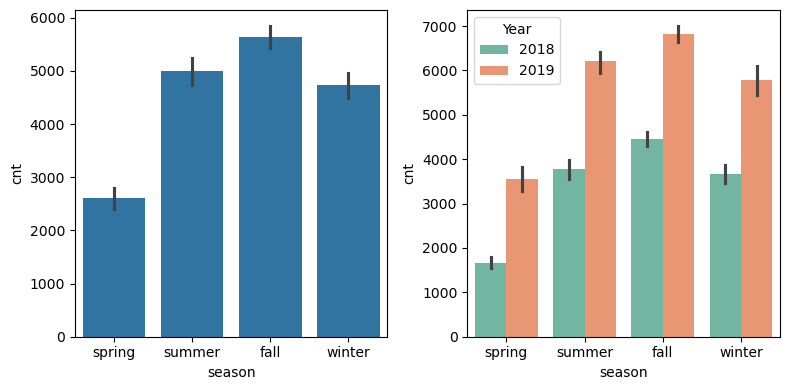

In [229]:
plot_cat_columns('season')

#### Observation : Fall Season seems to have more bookings and bookings have been increased from 2018 to 2019 for each season

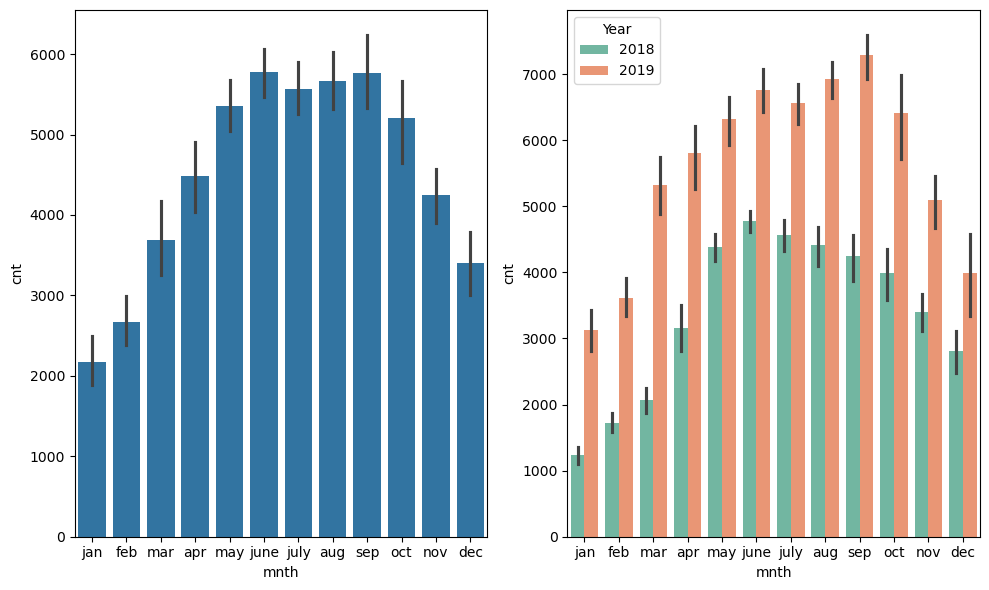

In [232]:
plot_cat_columns('mnth')

#### Most of the Booking are in May, Jun, Jul till Oct. The trend of increasing the booking started in initial time of the year and started decreasing at the end of the year. Booking have been increased from 2018 to 2019 for all over the months. 

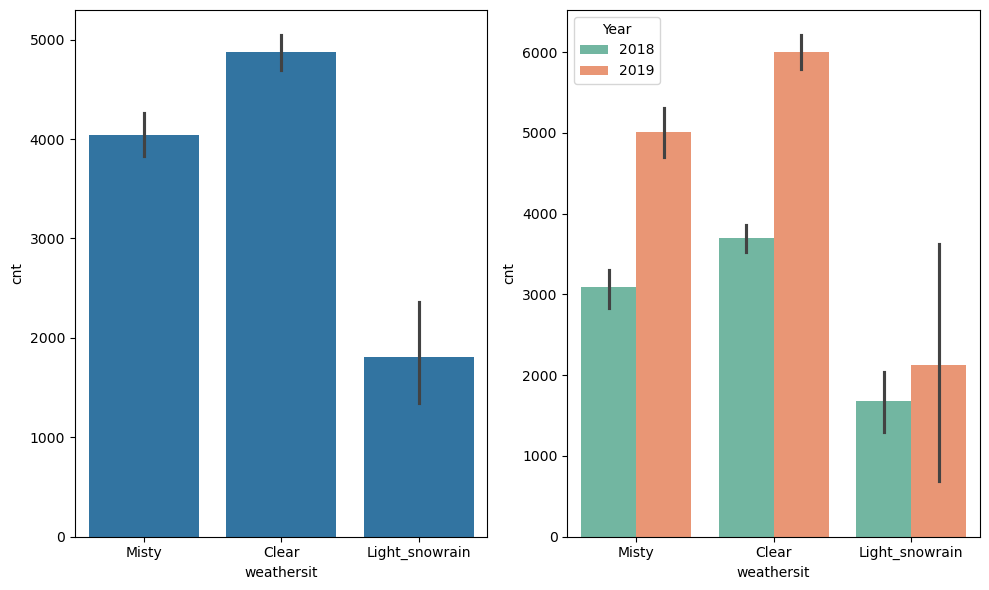

In [233]:
plot_cat_columns('weathersit')

### Clear weather attracted more bookings and it got increased in 2019 compare to 2018.

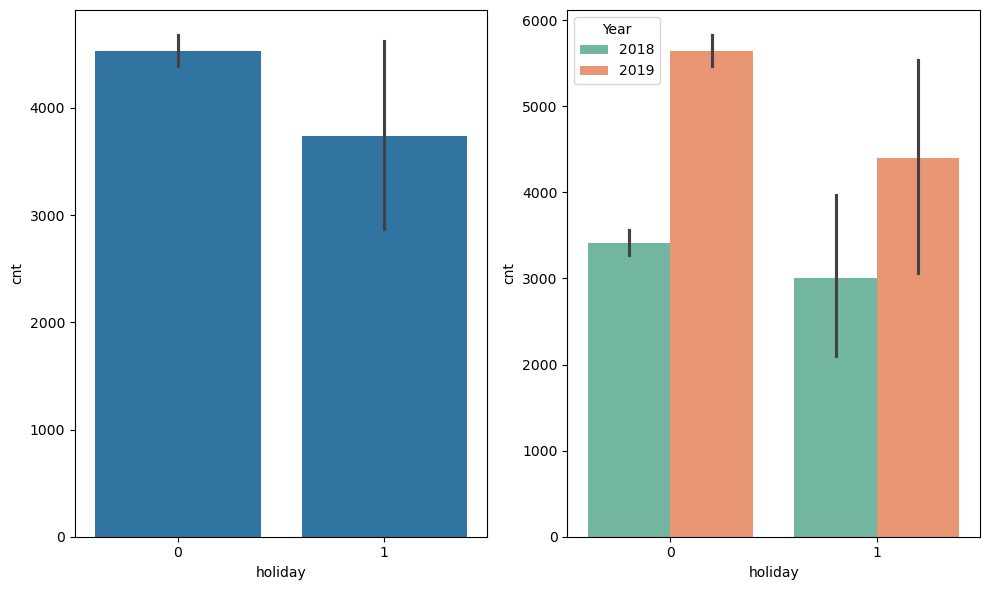

In [234]:
plot_cat_columns('holiday')

#### It seems obvious that bookings are more on holidays compare to working days as people prefer to spend time with their families on these days.

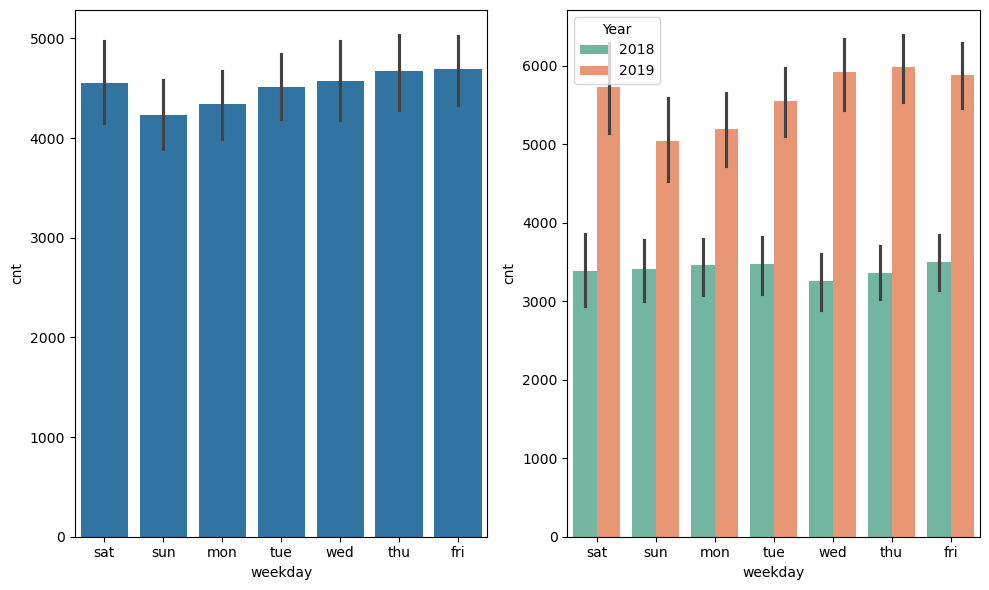

In [235]:
plot_cat_columns('weekday')

#### Thursday,Friday and Saturday has more bookings compared to other week starting days.

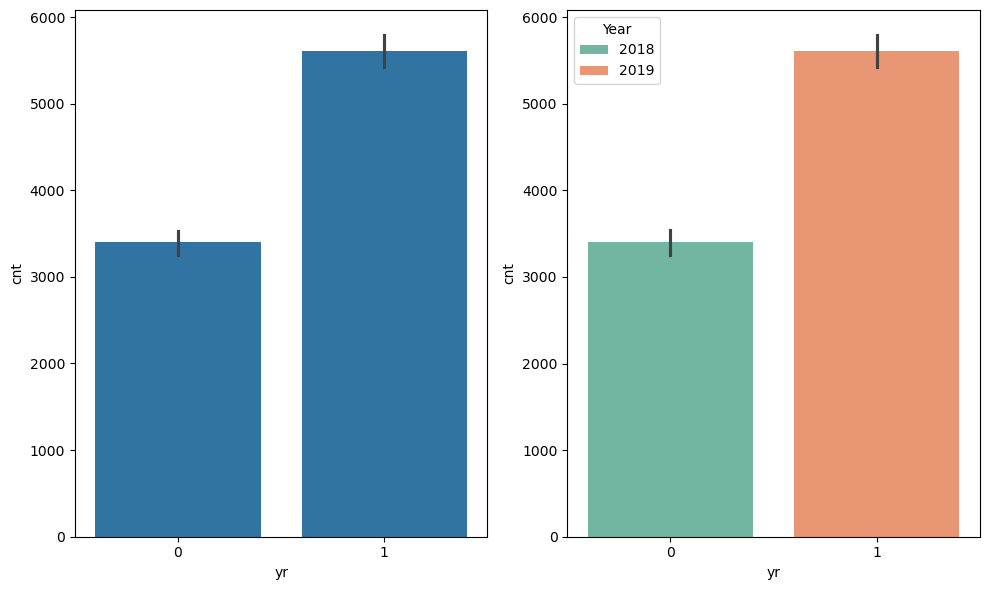

In [236]:
plot_cat_columns('yr')

#### Clearly Booking have been increased from 2018 to 2019.

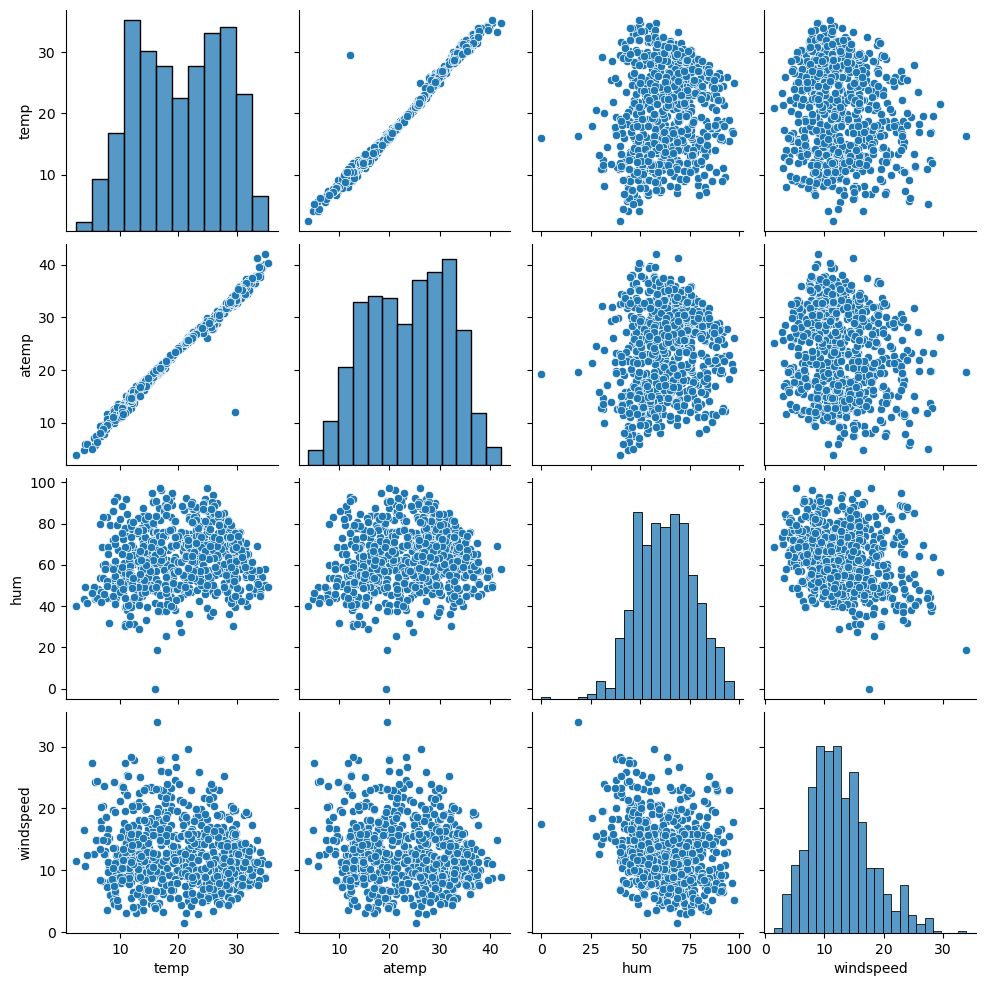

In [243]:
# Analysing Numerical Columns
sns.pairplot(data=df,vars=['temp','atemp','hum','windspeed'])

In [244]:
corr=df[['temp','atemp','hum','windspeed']].corr()

<Axes: >

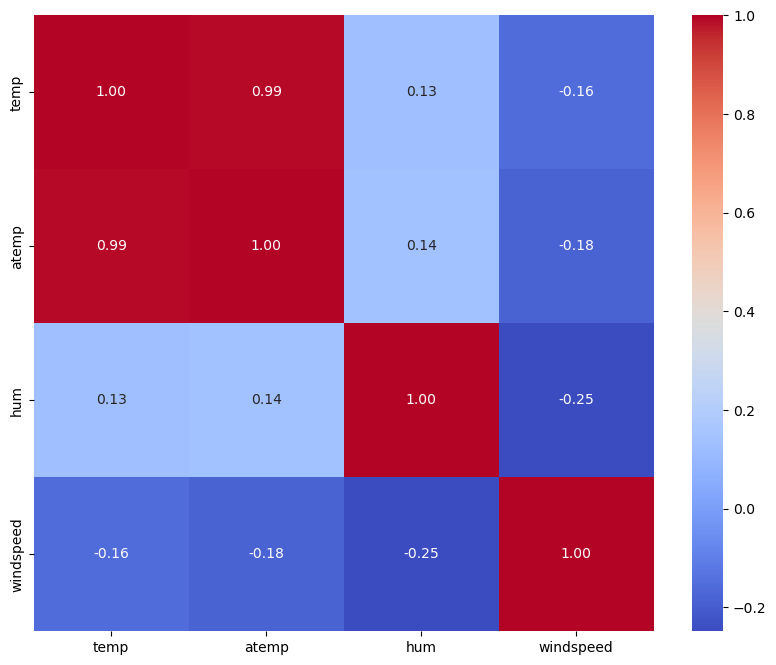

In [245]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True,fmt='.2f',cbar=True,cmap='coolwarm')

#### Since there is very strong linear relationship between "temp" and "atemp", so we can't use in the model due to multicoliniearity. We will keep varible based on VIF or P Value.

In [246]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Data Preparation

In [261]:
# Apply one-hot encoding to create dummy varibales of 'weekday', 'mnth', 'season', 'weathersit'

df_encoded = pd.get_dummies(df, columns=['weekday', 'mnth', 'season', 'weathersit'],drop_first=True)
df_encoded = df_encoded.astype(float)

In [262]:
df_encoded

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weekday_mon,weekday_sat,...,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,season_spring,season_summer,season_winter,weathersit_Light_snowrain,weathersit_Misty
0,0.0,0.0,0.0,14.110847,18.18125,80.5833,10.749882,985.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,14.902598,17.68695,69.6087,16.652113,801.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,8.050924,9.47025,43.7273,16.636703,1349.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,8.200000,10.60610,59.0435,10.739832,1562.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,9.305237,11.46350,43.6957,12.522300,1600.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1.0,0.0,1.0,10.420847,11.33210,65.2917,23.458911,2114.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
726,1.0,0.0,1.0,10.386653,12.75230,59.0000,10.416557,3095.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
727,1.0,0.0,0.0,10.386653,12.12000,75.2917,8.333661,1341.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
728,1.0,0.0,0.0,10.489153,11.58500,48.3333,23.500518,1796.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [277]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         730 non-null    float64
 1   holiday                    730 non-null    float64
 2   workingday                 730 non-null    float64
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   hum                        730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    float64
 8   weekday_mon                730 non-null    float64
 9   weekday_sat                730 non-null    float64
 10  weekday_sun                730 non-null    float64
 11  weekday_thu                730 non-null    float64
 12  weekday_tue                730 non-null    float64
 13  weekday_wed                730 non-null    float64

In [278]:
df_encoded.shape

(730, 30)

## Seperate data into Train and Test data

In [336]:
df_train, df_test = train_test_split(df_encoded,test_size=0.2, random_state=42)

In [280]:
df_train.shape

(584, 30)

In [281]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 247 to 102
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         584 non-null    float64
 1   holiday                    584 non-null    float64
 2   workingday                 584 non-null    float64
 3   temp                       584 non-null    float64
 4   atemp                      584 non-null    float64
 5   hum                        584 non-null    float64
 6   windspeed                  584 non-null    float64
 7   cnt                        584 non-null    float64
 8   weekday_mon                584 non-null    float64
 9   weekday_sat                584 non-null    float64
 10  weekday_sun                584 non-null    float64
 11  weekday_thu                584 non-null    float64
 12  weekday_tue                584 non-null    float64
 13  weekday_wed                584 non-null    float64
 1

In [266]:
df_test.shape

(146, 30)

In [282]:
# Select the columns to scale
scaling_columns = ['temp', 'atemp', 'windspeed','windspeed','cnt']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the selected columns
df_train[scaling_columns] = scaler.fit_transform(df_train[scaling_columns])

# Check the scaled data
df_train[scaling_columns].head()


,temp,atemp,windspeed,windspeed,cnt
247,0.941813,0.896189,0.352149,0.352149,-0.611945
335,-1.029248,-0.922897,-1.144131,-1.144131,-0.310416
702,-0.142044,-0.072002,-0.163360,-0.163360,1.054397
440,0.068329,0.150533,-1.011134,-1.011134,1.684075
136,0.329003,0.357555,1.216404,1.216404,-0.216733


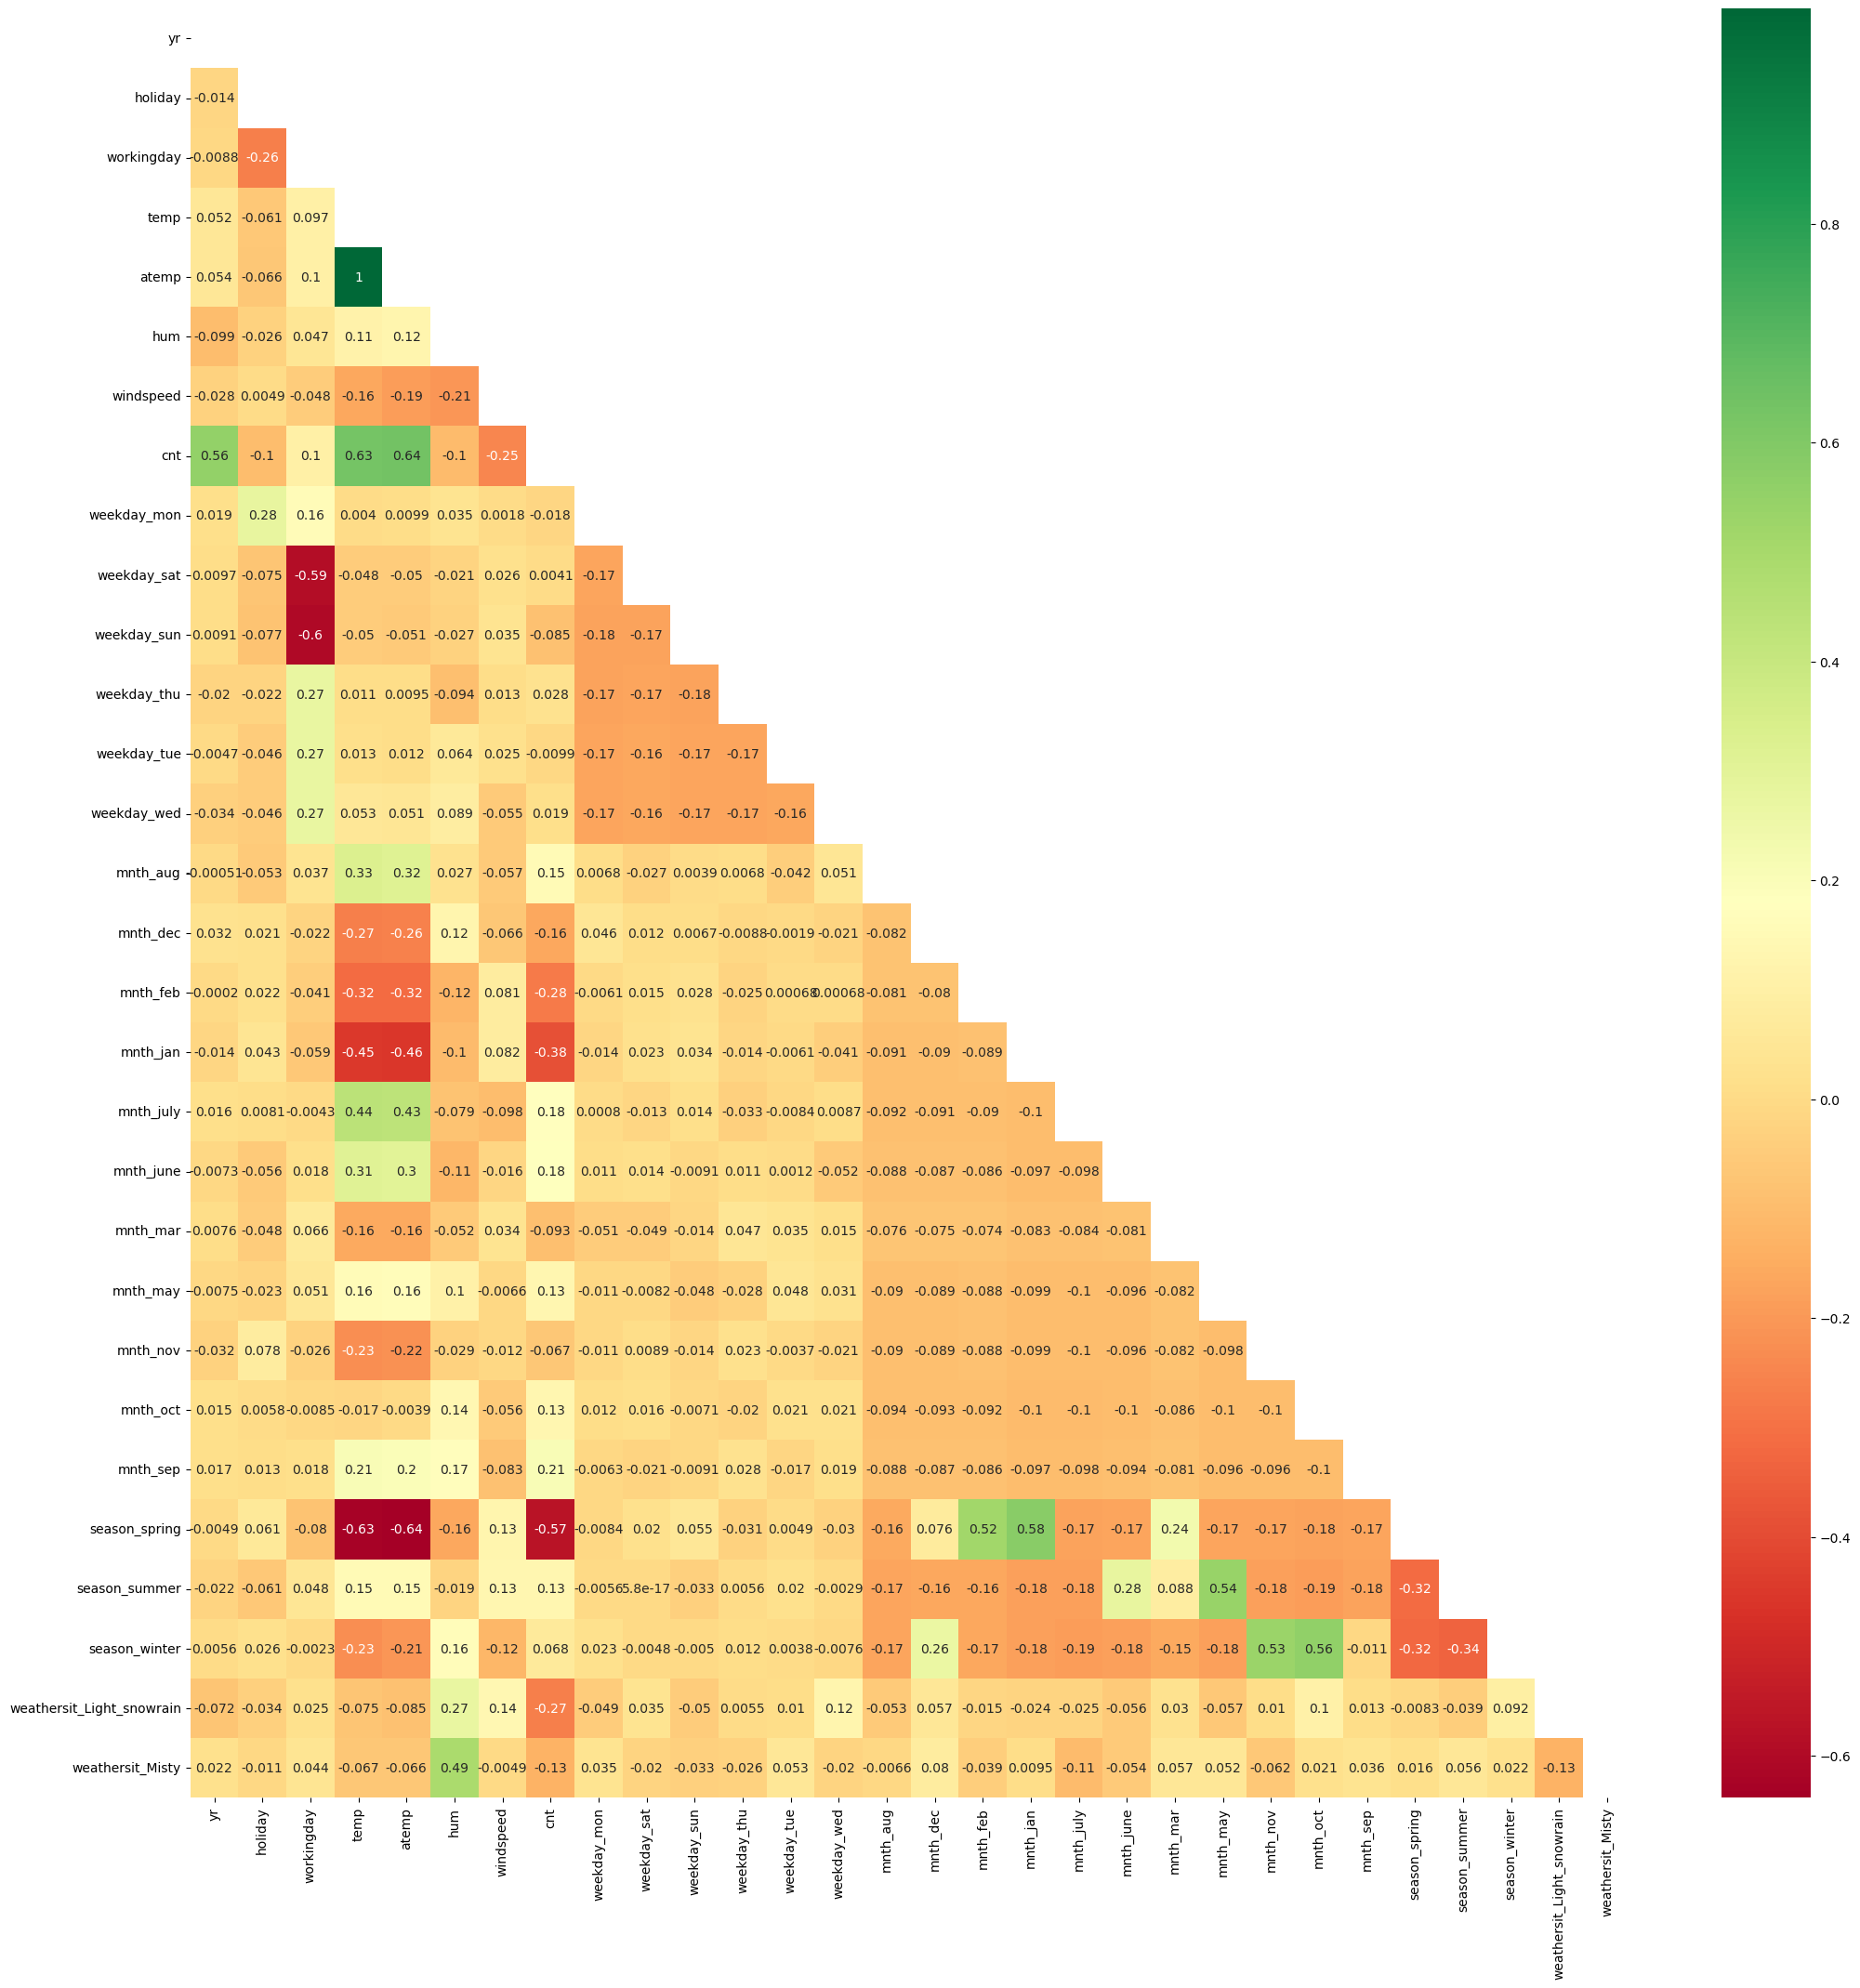

In [283]:
plt.figure(figsize=(25, 25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()
# sns.heatmap(df_train.corr(),annot=True,fmt='.2f',cbar=True,cmap='coolwarm')

#### "cnt" variable seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

In [285]:
X_train = df_train
y_train = df_train.pop('cnt')

In [292]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

rfe = RFE(estimator=model, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [293]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', False, 13),
 ('windspeed', False, 4),
 ('weekday_mon', False, 7),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 15),
 ('mnth_aug', False, 3),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_july', True, 1),
 ('mnth_june', False, 14),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sep', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

In [294]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'weekday_sat', 'mnth_dec',
       'mnth_july', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_sep',
       'season_spring', 'season_winter', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')


In [295]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'hum', 'windspeed', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'mnth_aug', 'mnth_feb',
       'mnth_jan', 'mnth_june', 'mnth_oct', 'season_summer'],
      dtype='object')

In [296]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [297]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [298]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,temp,3.11
11,season_spring,3.08
2,workingday,3.04
12,season_winter,2.69
0,yr,1.92
9,mnth_nov,1.83
14,weathersit_Misty,1.55
6,mnth_july,1.51
4,weekday_sat,1.40
5,mnth_dec,1.39


## Model Building

In [299]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     182.8
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          6.38e-206
Time:                        11:44:24   Log-Likelihood:                -314.03
No. Observations:                 584   AIC:                             660.1
Df Residuals:                     568   BIC:                             730.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [310]:
# As holiday shows high P values hence we can drop it
X_train_new = X_train_rfe.drop(['holiday'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.09
10,season_spring,2.95
1,workingday,2.85
11,season_winter,2.66
0,yr,1.91
8,mnth_nov,1.81
13,weathersit_Misty,1.54
5,mnth_july,1.50
4,mnth_dec,1.39
3,weekday_sat,1.36


In [311]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     195.5
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.01e-206
Time:                        12:18:56   Log-Likelihood:                -314.87
No. Observations:                 584   AIC:                             659.7
Df Residuals:                     569   BIC:                             725.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [312]:
lr_2.params

const                       -0.511433
yr                           1.032197
workingday                   0.219465
temp                         0.423635
weekday_sat                  0.276483
mnth_dec                    -0.250787
mnth_july                   -0.164814
mnth_mar                     0.259595
mnth_may                     0.145143
mnth_nov                    -0.345347
mnth_sep                     0.251667
season_spring               -0.592018
season_winter                0.429718
weathersit_Light_snowrain   -1.363672
weathersit_Misty            -0.349824
dtype: float64

In [313]:
X_train_lm_2

,const,yr,workingday,temp,weekday_sat,mnth_dec,mnth_july,mnth_mar,mnth_may,mnth_nov,mnth_sep,season_spring,season_winter,weathersit_Light_snowrain,weathersit_Misty
247,1.0,0.0,0.0,0.941813,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
335,1.0,0.0,1.0,-1.029248,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
702,1.0,1.0,1.0,-0.142044,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
440,1.0,1.0,0.0,0.068329,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
136,1.0,0.0,1.0,0.329003,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.0,0.0,0.0,-0.644103,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
106,1.0,0.0,0.0,-0.247225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
270,1.0,0.0,1.0,0.731446,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
435,1.0,1.0,1.0,-0.192346,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [314]:
y_train_pred = lr_2.predict(X_train_lm_2)

## Residual Analysis

C:\Users\NG0318\AppData\Local\Temp\ipykernel_24756\3536760436.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Errors')

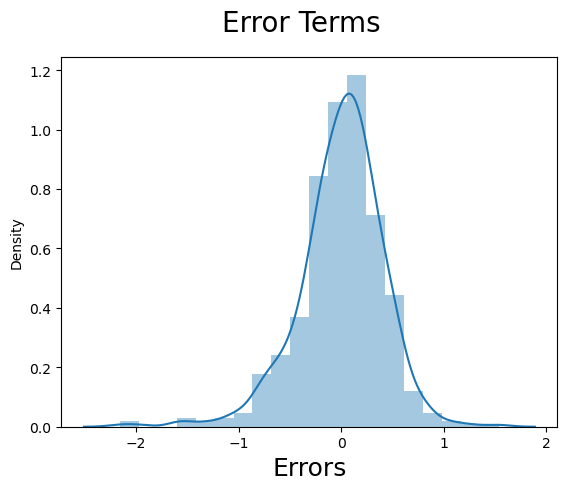

In [315]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [316]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.09
10,season_spring,2.95
1,workingday,2.85
11,season_winter,2.66
0,yr,1.91
8,mnth_nov,1.81
13,weathersit_Misty,1.54
5,mnth_july,1.50
4,mnth_dec,1.39
3,weekday_sat,1.36


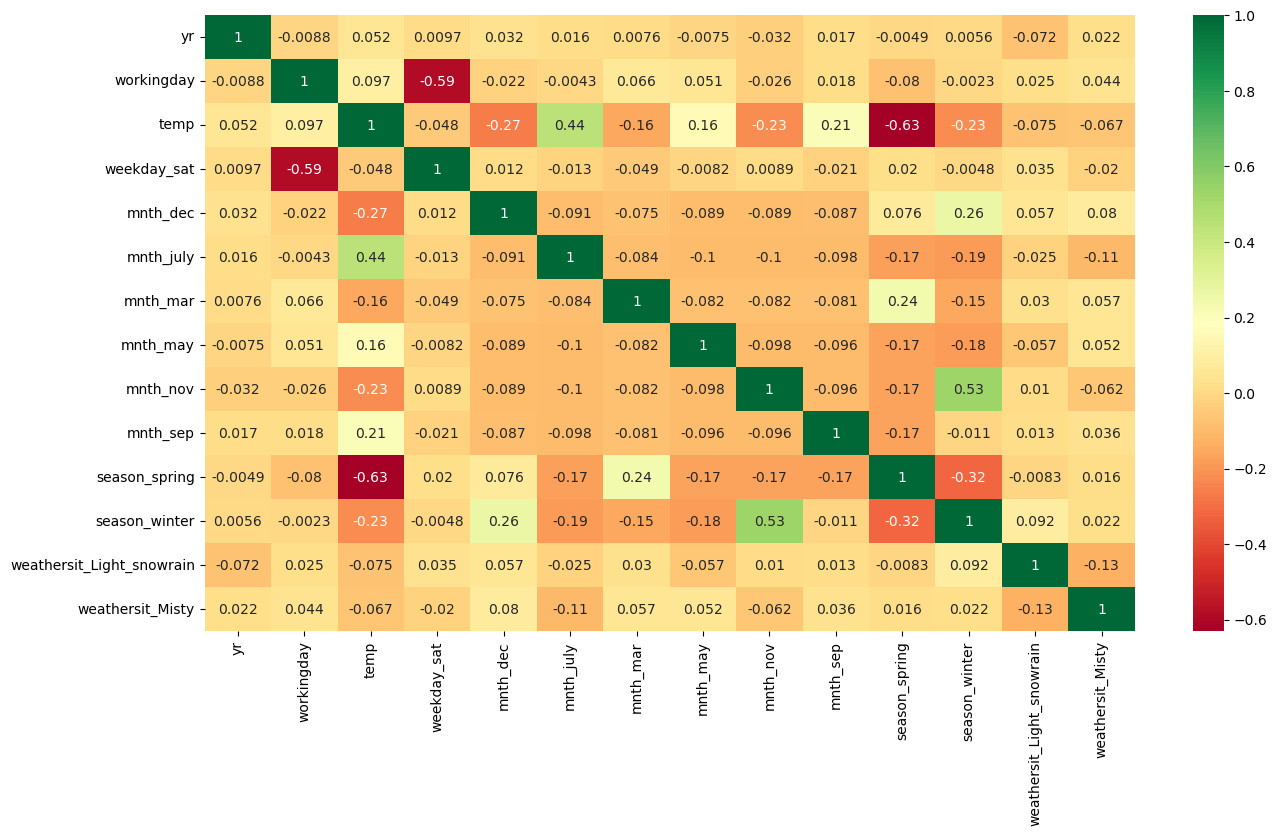

In [317]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

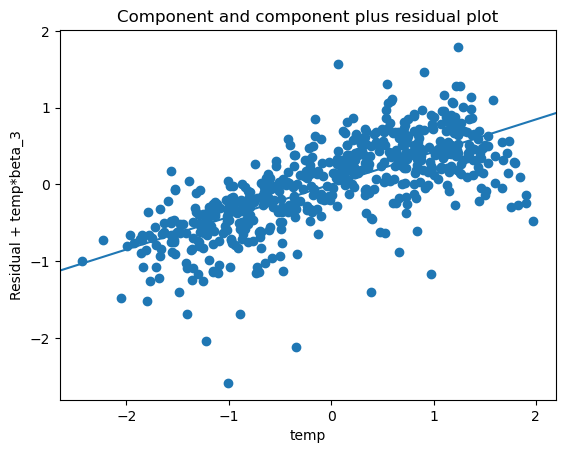

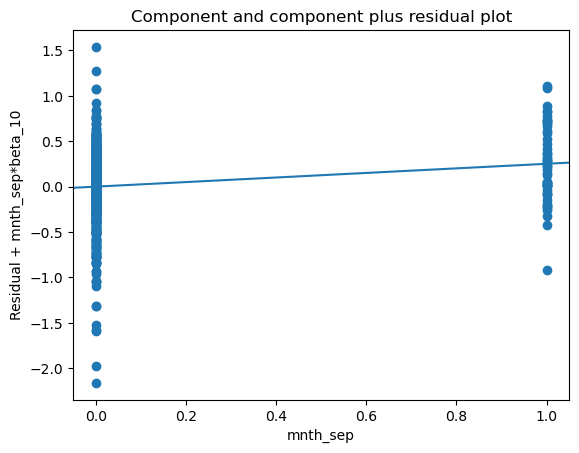

In [321]:
sm.graphics.plot_ccpr(lr_2, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_2, 'mnth_sep')
plt.show()

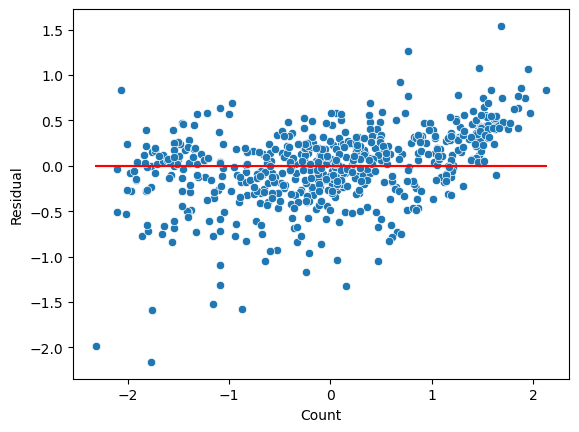

In [325]:
y_train_pred = lr_2.predict(X_train_lm_2)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

## Make Prediction using Final Model

In [328]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'windspeed','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weekday_mon,weekday_sat,...,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,season_spring,season_summer,season_winter,weathersit_Light_snowrain,weathersit_Misty
468,1.0,0.0,0.0,-0.036858,0.045115,50.2917,0.061038,1.491588,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
148,0.0,0.0,0.0,0.909802,0.833767,81.8750,0.368750,0.123703,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
302,0.0,0.0,0.0,-1.001808,-0.985369,62.3750,-0.130104,-0.622184,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
355,0.0,0.0,1.0,-0.430158,-0.337451,75.7500,-1.858961,-0.756822,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
515,1.0,0.0,1.0,0.978401,0.931327,49.2917,0.119343,1.429133,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [329]:
y_test = df_test.pop('cnt')
X_test = df_test

In [330]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_2 = sm.add_constant(X_test)

In [331]:
y_pred = lr_2.predict(X_test_lm_2)

In [332]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8359

## Model Evaluation

Text(0, 0.5, 'y_pred')

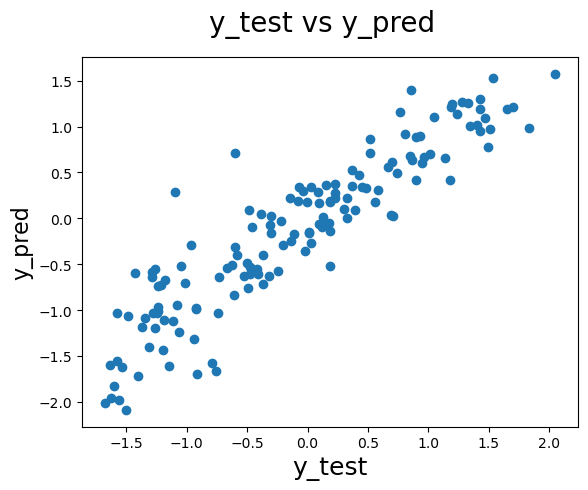

In [333]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [334]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8184


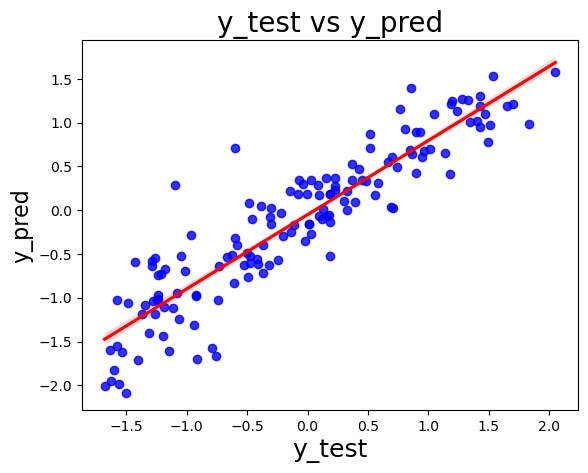

In [335]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()